# Definition
Logistic regression is used to describe data and to explain the relationship between one dependent **binary** variable and one or more nominal, ordinal, interval or ratio-level independent variables. Unlike actual regression, logistic regression does not try to predict the value of a numeric variable given a set of inputs. Instead, the output is a **probability** that the given input point belongs to a certain class.

**Type of questions that a binary logistic regression can examine:**

* How does the probability of getting lung cancer (yes vs. no) change for every additional pound a person is overweight and for every pack of cigarettes smoked per day?
* Do body weight, calorie intake, fat intake, and age have an influence on the probability of having a heart attack (yes vs. no)?

**Why not use Linear Regression?**

The central premise of Logistic Regression is the assumption that your input space can be separated into two nice ‘regions’, one for each class, by a straight boundary. If we fit best found regression line, it still won’t be enough to decide any point by which we can differentiate classes, especially in presence of outlier data. It will put some positive class examples into negative class.

### References

1. https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
2. https://en.wikipedia.org/wiki/Logistic_regression
3. https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
4. https://codesachin.wordpress.com/2015/08/16/logistic-regression-for-dummies/

# Logistic Regression Demo

#### Generic Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=20)

#### Sample data from Ref #2

In [5]:
wiki_logreg= {'explanatory': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5], 
                       'response':[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]}
logreg_df = pd.DataFrame.from_dict(wiki_logreg)
logreg_df

,explanatory,response
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


#### Plot the data

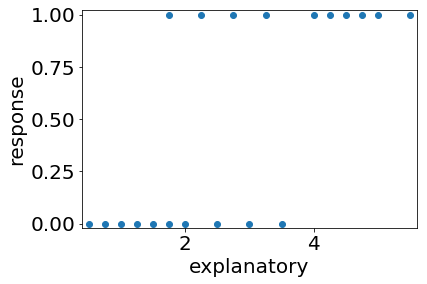

In [6]:
expl = logreg_df.iloc[:,0]
resp = logreg_df.iloc[:,1]
_ = plt.plot(expl, resp, marker='o', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('explanatory')
_ = plt.ylabel('response')
plt.margins(0.02)
plt.show()

#### Create the model using statmodels.api

In [7]:
import statsmodels.api as sm

x = sm.add_constant(expl)
y = resp

logit_model=sm.Logit(y, x)

result=logit_model.fit(method='bfgs', maxiter=1000)

print(result.summary())

/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.401494
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
                           Logit Regression Results                           
Dep. Variable:               response   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Apr 2018   Pseudo R-squ.:                  0.4208
Time:                        08:55:14   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                 0.0006365
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.0777      1.761   

In [8]:
# Coefficients can be exported

b0 = result.params[0]
b1 = result.params[1]
print("intercept: ",b0)
print("slope: ",b1)

intercept:  -4.07771408355
slope:  1.50464686157


#### Calculating the probability for the explanatory data

In [9]:
logreg_df['p']= 1 / (1 + np.exp(-(b0  +b1*expl)))

logreg_df

,explanatory,response,p
0,0.50,0,0.034710
1,0.75,0,0.049773
2,1.00,0,0.070892
3,1.25,0,0.100029
4,1.50,0,0.139345
5,1.75,0,0.190837
6,1.75,1,0.190837
7,2.00,0,0.255704
8,2.25,1,0.333531
9,2.50,0,0.421627


#### Compare the data with the model

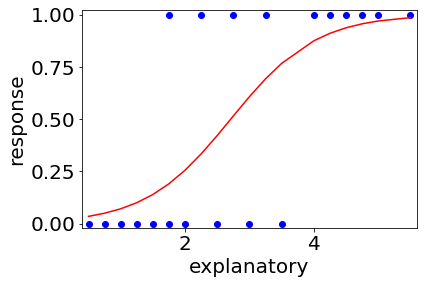

In [10]:
expl = logreg_df.iloc[:,0]
resp = logreg_df.iloc[:,1]
esti = logreg_df.iloc[:,2]

_ = plt.plot(expl, resp, marker='o', linestyle='none', color = 'blue')
_ = plt.plot(expl, esti, linestyle='-', color = 'red')


# Label axes, set the margins, and show the plot
_ = plt.xlabel('explanatory')
_ = plt.ylabel('response')
plt.margins(0.02)
plt.show()